# MNIST

MNIST stands for Mixed National Institute of Standards and Technology, which has produced a handwritten digits dataset. This is one of the most researched datasets in machine learning, and is used to classify handwritten digits. This dataset contains 60,000 training images and 10,000 testing images, formatted as 28 x 28 pixel monochrome images. 



In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml(name = 'mnist_784',return_X_y=True, as_frame=False)

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


And the first image is... (displayed as raw data)

Text(0.5, 1.0, '5')

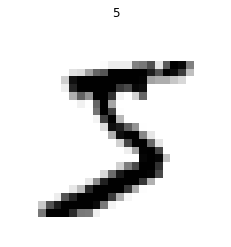

In [ ]:
index=0
image = X[index].reshape(28,28)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(4,4))
axes.imshow(image,cmap=plt.cm.binary)
axes.axis('off')
axes.set_title(y[index])

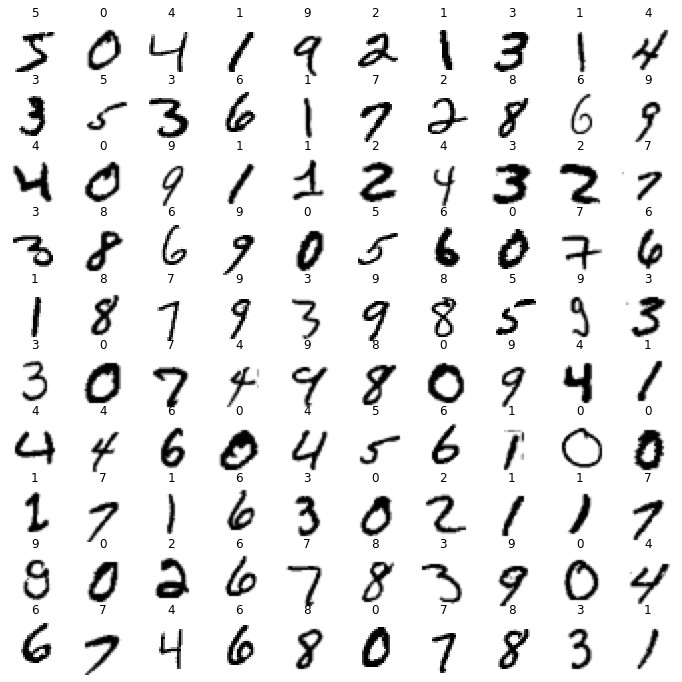

In [ ]:
fig, axes = plt.subplots(10,10, figsize=(12,12))
for i in range(10):
  for j in range(10):
    axes[i][j].imshow(X[10*i+j].reshape(28,28),cmap=plt.cm.binary)
    axes[i][j].axis('off')
    axes[i][j].set_title(y[10*i+j])

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
#Your code goes here
from yellowbrick.contrib.classifier import DecisionViz
import matplotlib.pyplot as plt

**Scaling the data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

**Train using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scale, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
    .format(knn.score(X_train_scale, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
    .format(knn.score(X_test_scale, y_test)))

In [ ]:
index=4
image = X_test[index].reshape(28,28)
fig, axes = plt.subplots(figsize=(4,4))
axes.imshow(image,cmap=plt.cm.binary)
axes.axis('off')
axes.set_title(y_test[index])
y_pred = knn.predict([X_test_scale[index]])
print("predicted label: ", y_pred)

**Train using SVC**

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train_scale, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
    .format(svm_clf.score(X_train_scale, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm_clf.score(X_test_scale, y_test)))

SVC()

predicted label  ['4']


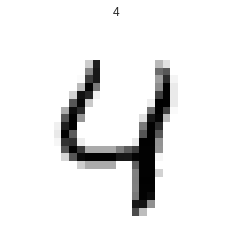

In [ ]:
index=4
image = X_test[index].reshape(28,28)
fig, axes = plt.subplots(figsize=(4,4))
axes.imshow(image,cmap=plt.cm.binary)
axes.axis('off')
axes.set_title(y_test[index])
y_pred = svm_clf.predict([X_test_scale[index]])
print("predicted label ", y_pred)